In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [177]:
df_train = pd.read_csv("data/train.csv")
#df_train.set_index("PassengerId", inplace = True)

df_test = pd.read_csv("data/test.csv")

# EDA

In [178]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
df_train.describe(include=["O"]).round(2)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [180]:
df_train.groupby(["Pclass"], as_index = False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [181]:
df_train.groupby(["Sex"], as_index = False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [182]:
df_train["Family_size"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["Family_size"] = df_test["SibSp"] + df_test["Parch"] + 1

In [183]:
df_train.groupby(["Family_size"], as_index = False)["Survived"].mean()

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [184]:
family_size = {1: "Alone", 2: "Small", 3: "Small", 4: "Small", 5: "Medium", 6: "Medium", 7: "Large", 8: "Large", 11: "Large"}
df_train["Family_size_group"] = df_train["Family_size"].map(family_size)
df_test["Family_size_group"] = df_test["Family_size"].map(family_size)

In [185]:
df_train.groupby("Family_size_group", as_index = False)["Survived"].mean()

,Family_size_group,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [186]:
df_train.groupby(["Embarked"], as_index = False )["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


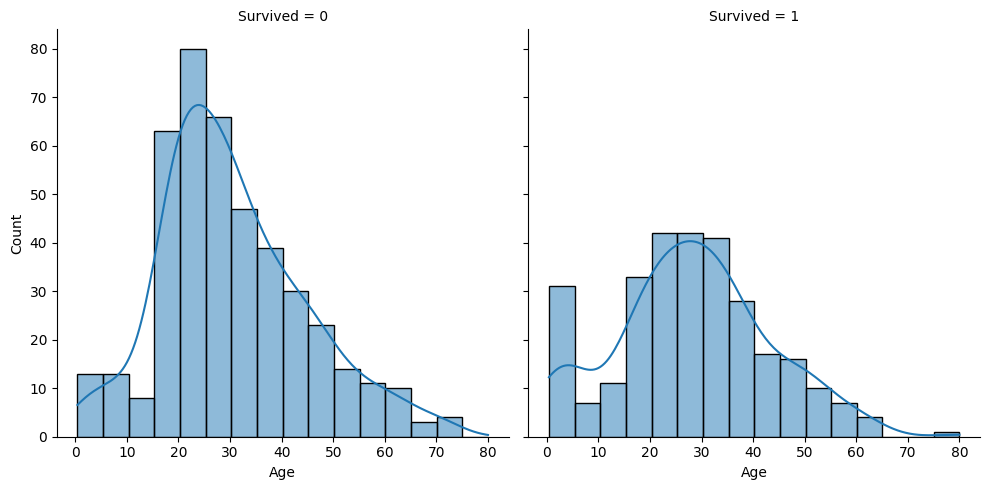

In [187]:
sns.displot(df_train, x = "Age", col = "Survived", kde = True, binwidth = 5)

In [188]:
df_train["Age_cut"] = pd.qcut(df_train["Age"], q = 8)
df_test["Age_cut"] = pd.qcut(df_test["Age"], q = 8)

In [189]:
df_train.groupby(["Age_cut"], as_index = False )["Survived"].mean()

/var/folders/3q/54yj5kx13f71th287k1j3ll80000gn/T/ipykernel_1451/4011937594.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(["Age_cut"], as_index = False )["Survived"].mean()


,Age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [190]:
#bin ages into groups
df_train.loc[df_train["Age"] <= 16, "Age"] = 0
df_train.loc[(df_train["Age"] > 16) & (df_train["Age"] <= 20.125), "Age"] = 1
df_train.loc[(df_train["Age"] > 20.125) & (df_train["Age"] <= 24), "Age"] = 2
df_train.loc[(df_train["Age"] > 24) & (df_train["Age"] <= 28), "Age"] = 3
df_train.loc[(df_train["Age"] > 28) & (df_train["Age"] <= 32.312), "Age"] = 4
df_train.loc[(df_train["Age"] > 32.312) & (df_train["Age"] <= 38), "Age"] = 5
df_train.loc[(df_train["Age"] > 38) & (df_train["Age"] <= 47), "Age"] = 6
df_train.loc[(df_train["Age"] > 47) & (df_train["Age"] <= 80), "Age"] = 7

df_test.loc[df_test["Age"] <= 16, "Age"] = 0
df_test.loc[(df_test["Age"] > 16) & (df_test["Age"] <= 20.125), "Age"] = 1
df_test.loc[(df_test["Age"] > 20.125) & (df_test["Age"] <= 24), "Age"] = 2
df_test.loc[(df_test["Age"] > 24) & (df_test["Age"] <= 28), "Age"] = 3
df_test.loc[(df_test["Age"] > 28) & (df_test["Age"] <= 32.312), "Age"] = 4
df_test.loc[(df_test["Age"] > 32.312) & (df_test["Age"] <= 38), "Age"] = 5
df_test.loc[(df_test["Age"] > 38) & (df_test["Age"] <= 47), "Age"] = 6
df_test.loc[(df_test["Age"] > 47) & (df_test["Age"] <= 80), "Age"] = 7

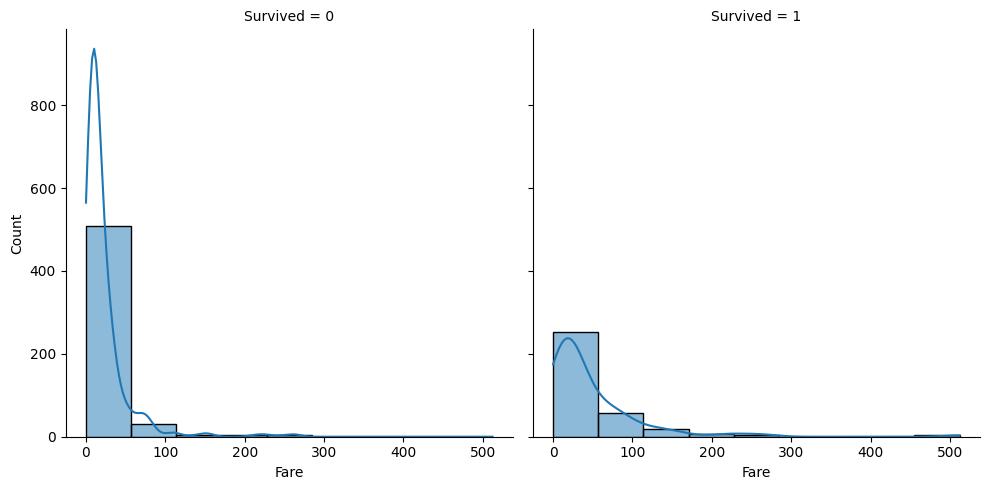

In [191]:
sns.displot(df_train, x = "Fare", col = "Survived", kde = True, binwidth = 60)

In [192]:
#lets bin the fare into groups
df_train["Fare_Cut"] = pd.qcut(df_train["Fare"], q = 6)
df_test["Fare_Cut"] = pd.qcut(df_test["Fare"], q = 6)

In [193]:
df_train.groupby(["Fare_Cut"], as_index = False)["Survived"].mean()

/var/folders/3q/54yj5kx13f71th287k1j3ll80000gn/T/ipykernel_1451/2411483388.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(["Fare_Cut"], as_index = False)["Survived"].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [194]:
#bin ages into groups
df_train.loc[df_train["Fare"] <= 7.775, "Fare"] = 0
df_train.loc[(df_train["Fare"] > 7.775) & (df_train["Fare"] <= 8.662), "Fare"] = 1
df_train.loc[(df_train["Fare"] > 8.662) & (df_train["Fare"] <= 14.454), "Fare"] = 2
df_train.loc[(df_train["Fare"] > 14.454) & (df_train["Fare"] <= 26), "Fare"] = 3
df_train.loc[(df_train["Fare"] > 26) & (df_train["Fare"] <= 52.369), "Fare"] = 4
df_train.loc[(df_train["Fare"] > 52.369) & (df_train["Fare"] <= 512.329), "Fare"] = 5

df_test.loc[df_test["Fare"] <= 7.775, "Fare"] = 0
df_test.loc[(df_test["Fare"] > 7.775) & (df_test["Fare"] <= 8.662), "Fare"] = 1
df_test.loc[(df_test["Fare"] > 8.662) & (df_test["Fare"] <= 14.454), "Fare"] = 2
df_test.loc[(df_test["Fare"] > 14.454) & (df_test["Fare"] <= 26), "Fare"] = 3
df_test.loc[(df_test["Fare"] > 26) & (df_test["Fare"] <= 52.369), "Fare"] = 4
df_test.loc[(df_test["Fare"] > 52.369) & (df_test["Fare"] <= 512.329), "Fare"] = 5

In [195]:
#finding the title of a person
df_train["Title"] = df_train["Name"].str.split(",", expand = True)[1].str.split(".", expand = True)[0].apply(lambda x: x.strip())
df_test["Title"] = df_test["Name"].str.split(",", expand = True)[1].str.split(".", expand = True)[0].apply(lambda x: x.strip())

In [196]:
df_train.groupby(["Title"], as_index=False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [197]:
#lets group the titles
dict_titles = {
"military": ["Capt", "Col", "Major"],
"noble": ["Don", "Dona", "Jonkheer", "Lady", "Sir", "the Countess"],
"females": ["Mlle", "Mme", "Ms"],
"profession": ["Dr", "Rev"]
}

reversed_dict = {title: key for key, value in dict_titles.items() for title in value}

df_train["Title"] = df_train["Title"].replace(reversed_dict)

In [198]:
df_train.groupby(["Title"], as_index=False)["Survived"].agg(["mean", "count"])

,Title,mean,count
0,Master,0.575000,40
1,Miss,0.697802,182
2,Mr,0.156673,517
3,Mrs,0.792000,125
4,females,1.000000,4
5,military,0.400000,5
6,noble,0.600000,5
7,profession,0.230769,13


In [199]:
df_train["Name_Length"] = df_train['Name'].apply(lambda x: len(x))
df_test["Name_Length"] = df_test['Name'].apply(lambda x: len(x))

In [200]:
df_train['Name_Length']

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name_Length, Length: 891, dtype: int64

/var/folders/3q/54yj5kx13f71th287k1j3ll80000gn/T/ipykernel_1451/1760472976.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(argument_died, shade = True, color = "r", label = "Died", fill = True)
/var/folders/3q/54yj5kx13f71th287k1j3ll80000gn/T/ipykernel_1451/1760472976.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(argument_survived, shade = True, color = "b", label = "Survived", fill = True)


<Axes: xlabel='Name_Length', ylabel='Density'>

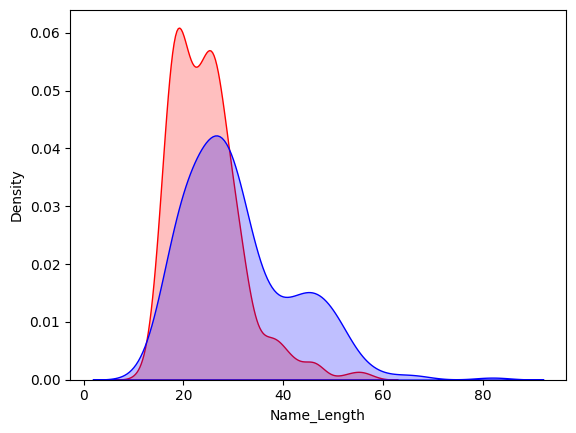

In [201]:
argument_died = df_train.loc[(df_train['Survived'] == 0) & (df_train['Name_Length'].notnull()), 'Name_Length']
argument_survived = df_train.loc[(df_train['Survived'] == 1) & (df_train['Name_Length'].notnull()), 'Name_Length']

sns.kdeplot(argument_died, shade = True, color = "r", label = "Died", fill = True)
sns.kdeplot(argument_survived, shade = True, color = "b", label = "Survived", fill = True)

In [202]:
df_train['Name_LengthGB'] = pd.qcut(df_train['Name_Length'], q = 3)
df_test['Name_LengthGB'] = pd.qcut(df_test['Name_Length'], q = 3)

df_train.groupby(["Name_LengthGB"], as_index = False)["Survived"].mean()

/var/folders/3q/54yj5kx13f71th287k1j3ll80000gn/T/ipykernel_1451/1898711404.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(["Name_LengthGB"], as_index = False)["Survived"].mean()


,Name_LengthGB,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [203]:
df_train.loc[df_train['Name_Length'] <= 22, 'Name_Length'] = 0
df_train.loc[(df_train['Name_Length'] > 22) & (df_train['Name_Length'] <= 28), 'Name_Length'] = 1
df_train.loc[(df_train['Name_Length'] > 28) & (df_train['Name_Length'] <= 82), 'Name_Length'] = 2

df_test.loc[(df_test['Name_Length'] <= 22), 'Name_Length'] = 0
df_test.loc[(df_test['Name_Length'] > 22) & (df_test['Name_Length'] <= 28), 'Name_Length'] = 1
df_test.loc[(df_test['Name_Length'] > 28) & (df_test['Name_Length'] <= 82), 'Name_Length'] = 2

In [204]:
df_train['Ticket'].head(5)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

This might come in handy later on.

In [205]:
df_train["Ticket_Num"] = df_train["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))
df_test["Ticket_Num"] = df_test["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))

In [206]:
df_train["Ticket_Prefix"] = df_train['Ticket'].str.split(" ", expand = True)[0]
df_test["Ticket_Prefix"] = df_test['Ticket'].str.split(" ", expand = True)[0]

In [207]:
df_train['Cabin'] = df_train['Cabin'].fillna('U')
df_test['Cabin'] = df_test['Cabin'].fillna('U')

In [208]:
df_train['Cabin']

0         U
1       C85
2         U
3      C123
4         U
       ... 
886       U
887     B42
888       U
889    C148
890       U
Name: Cabin, Length: 891, dtype: object

In [209]:
# Retrieve the fist letter of the cabin
df_train['Cabin'] = pd.Series(df_train['Cabin'].str[0])
df_test['Cabin'] = pd.Series(df_test['Cabin'].str[0])

In [210]:
df_train.groupby(['Cabin'], as_index = False)['Survived'].agg(['mean', 'count'])

,Cabin,mean,count
0,A,0.466667,15
1,B,0.744681,47
2,C,0.593220,59
3,D,0.757576,33
4,E,0.750000,32
5,F,0.615385,13
6,G,0.500000,4
7,T,0.000000,1
8,U,0.299854,687


If cabin will have a big impact on predicting someones survival, we will have to drop T and G cabins as they have too little data. Also stratified validation might be a good idea.

In [211]:
df_train['Cabin_Assigned'] = df_train["Cabin"].apply(lambda x: 0 if x == "U" else 1)
df_test['Cabin_Assigned'] = df_test["Cabin"].apply(lambda x: 0 if x == "U" else 1)

In [212]:
df_train.groupby(['Cabin_Assigned'], as_index = False)['Survived'].agg(['mean', 'count'])

,Cabin_Assigned,mean,count
0,0,0.299854,687
1,1,0.666667,204


In [213]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Family_size_group', 'Age_cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Ticket_Num', 'Ticket_Prefix', 'Cabin_Assigned'],
      dtype='object')

In [214]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Family_size_group,Age_cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Ticket_Num,Ticket_Prefix,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,1,"(22.0, 28.0]",21171,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,2,"(28.0, 82.0]",17599,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,0,"(11.999, 22.0]",3101282,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,2,"(28.0, 82.0]",113803,113803,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,1,"(22.0, 28.0]",373450,373450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3.0,0,0,211536,2.0,...,1,Alone,"(24.0, 28.0]","(8.662, 14.454]",profession,0,"(11.999, 22.0]",211536,211536,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,4.0,...,1,Alone,"(16.0, 20.125]","(26.0, 52.369]",Miss,1,"(22.0, 28.0]",112053,112053,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.0,...,4,Small,NaN,"(14.454, 26.0]",Miss,2,"(28.0, 82.0]",6607,W./C.,0
889,890,1,1,"Behr, Mr. Karl Howell",male,3.0,0,0,111369,4.0,...,1,Alone,"(24.0, 28.0]","(26.0, 52.369]",Mr,0,"(11.999, 22.0]",111369,111369,1


In [215]:
df_train.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               2
Family_size            0
Family_size_group      0
Age_cut              177
Fare_Cut               0
Title                  0
Name_Length            0
Name_LengthGB          0
Ticket_Num             0
Ticket_Prefix          0
Cabin_Assigned         0
dtype: int64

In [216]:
# Drop columns with na values
df_train = df_train[df_train["Age"].notna()]
df_train = df_train[df_train["Embarked"].notna()]

In [217]:
df_train.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                0
Embarked             0
Family_size          0
Family_size_group    0
Age_cut              0
Fare_Cut             0
Title                0
Name_Length          0
Name_LengthGB        0
Ticket_Num           0
Ticket_Prefix        0
Cabin_Assigned       0
dtype: int64

In [219]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder()
SI = SimpleImputer(strategy = "most_frequent")

In [221]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Family_size_group,Age_cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Ticket_Num,Ticket_Prefix,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,1,"(22.0, 28.0]",21171,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,2,"(28.0, 82.0]",17599,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,0,"(11.999, 22.0]",3101282,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,2,"(28.0, 82.0]",113803,113803,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,1,"(22.0, 28.0]",373450,373450,0


In [222]:
ode_cols = ['family_size_grpup']
ohe_cols = ['Sex', 'Embarked']

In [224]:
df_train.drop(columns = ['Family_size', 'Age_cut', 'Fare_Cut'], inplace=True)
df_test.drop(columns = ['Family_size', 'Age_cut', 'Fare_Cut'], inplace=True)

X = df_train.drop(columns = ['Survived'])
Y = df_train['Survived']



In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)